In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

#this will start chrom
driver = webdriver.Chrome()
driver.get("https://www.imdb.com/chart/moviemeter/")

# load all movies
last_height = driver.execute_script("return document.body.scrollHeight")

#scrollllllll
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# extract links
links = driver.find_elements(By.CSS_SELECTOR, "a.ipc-title-link-wrapper")
movie_urls = ["https://www.imdb.com" + l.get_attribute("href").split("?")[0] for l in links]

print(movie_urls[:10])  #jst to check

driver.quit()


['https://www.imdb.comhttps://www.imdb.com/title/tt12001534/', 'https://www.imdb.comhttps://www.imdb.com/title/tt26581740/', 'https://www.imdb.comhttps://www.imdb.com/title/tt20969586/', 'https://www.imdb.comhttps://www.imdb.com/title/tt1493274/', 'https://www.imdb.comhttps://www.imdb.com/title/tt12300742/', 'https://www.imdb.comhttps://www.imdb.com/title/tt5950044/', 'https://www.imdb.comhttps://www.imdb.com/title/tt16311594/', 'https://www.imdb.comhttps://www.imdb.com/title/tt31973693/', 'https://www.imdb.comhttps://www.imdb.com/title/tt14205554/', 'https://www.imdb.comhttps://www.imdb.com/title/tt31184028/']


In [2]:
movie_urls = [i.split('/')[-2] for i in movie_urls] #get the id

In [3]:
with open('movie_list_100.txt','w') as f:
    for title in movie_urls:
        parts = title.split(",")
        for part in parts:
            f.write(part.strip() + "\n")

In [4]:
#Extract reviews...

import requests
from bs4 import BeautifulSoup

def get_reviews_with_ratings(imdb_id, max_reviews=10):
    url = f"https://www.imdb.com/title/{imdb_id}/reviews/?ref_=tt_ururv_sm&sort=num_votes%2Cdesc"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    reviews_data = []

    #each review block
    review_blocks = soup.find_all("div", class_="ipc-list-card__content")

    for block in review_blocks:
        #extract text
        review_div = block.find("div", class_="ipc-html-content ipc-html-content--base")
        review_text = review_div.get_text(strip=True) if review_div else None

        if review_text:  # only add if review text exists
            rating_span = block.find("span", class_="ipc-rating-star--rating")
            rating = rating_span.get_text(strip=True) if rating_span else None

            reviews_data.append({
                "review": review_text,
                "rating": rating
            })

        if len(reviews_data) >= max_reviews:
            break

    return reviews_data


#example for Shawshank Redemption
reviews = get_reviews_with_ratings("tt0111161", max_reviews=5)
for r in reviews:
    print(r)

{'review': "Can Hollywood, usually creating things for entertainment purposes only, create art?  To create something of this nature, a director must approach it in a most meticulous manner, due to the delicacy of the process.  Such a daunting task requires an extremely capable artist with an undeniable managerial capacity and an acutely developed awareness of each element of art in their films, the most prominent; music, visuals, script, and acting. These elements, each equally important, must succeed independently, yet still form a harmonious union, because this mixture determines the fate of the artist's opus.  Though already well known amongst his colleagues for his notable skills at writing and directing, Frank Darabont emerges with his feature film directorial debut, The Shawshank Redemption.  Proving himself already a master of the craft, Darabont managed to create one of the most recognizable independent releases in the history of Hollywood.  The Shawshank Redemption defines a g

In [ ]:
with open('movie_list_100.txt','r') as f:
    imdb_ids = [line.strip() for line in f.readlines() if line.strip()]
    
all_reviews = {}
for imdb_id in imdb_ids:
    all_reviews[imdb_id] = get_reviews_with_ratings(imdb_id, max_reviews=20)  #50 limit per movie


In [34]:
with open('series_list_100.txt','r') as f:
    imdb_ids = [line.strip() for line in f.readlines() if line.strip()]
    
all_reviews_1 = {}
for imdb_id in imdb_ids:
    all_reviews_1[imdb_id] = get_reviews_with_ratings(imdb_id, max_reviews=20)  #50 limit per movie


In [35]:
import json

with open("all_reviews_1.json", "w", encoding="utf-8") as f:
    json.dump(all_reviews_1, f, indent=4, ensure_ascii=False)


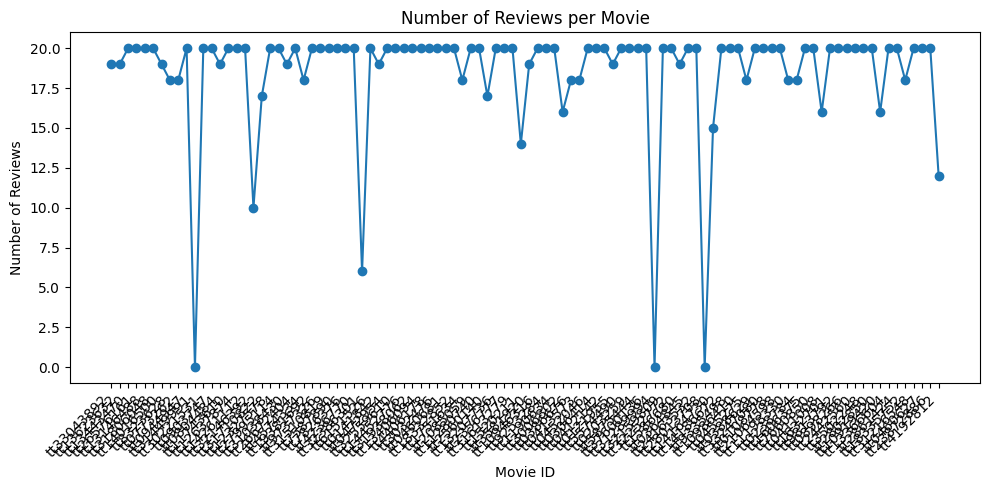

In [40]:
import matplotlib.pyplot as plt

with open("all_reviews_1.json", "r", encoding="utf-8") as f:
    dict_all_1 = json.load(f)

# print(enumerate(dict_all_1))
movie_ids_1 = list(dict_all_1.keys())
review_counts_1 = [len(reviews) for reviews in dict_all_1.values()]

plt.figure(figsize=(10,5))
plt.plot(movie_ids_1, review_counts_1, marker='o')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Movie ID")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Movie")
plt.tight_layout()
plt.show()

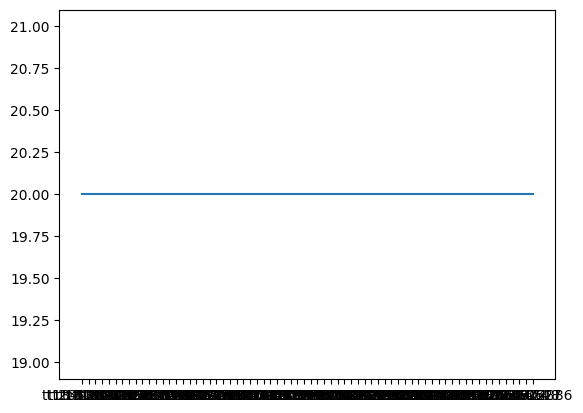

In [41]:
filtered_dict_1 = {imdb_id: reviews for imdb_id, reviews in dict_all_1.items() if len(reviews) >= 20}

movie_ids = list(filtered_dict_1.keys())
review_counts = [len(reviews) for reviews in filtered_dict_1.values()]

plt.plot(movie_ids, review_counts)

In [25]:
print(len(all_reviews['tt31184028']))

20


In [26]:
import json

with open("all_reviews.json", "w", encoding="utf-8") as f:
    json.dump(all_reviews, f, indent=4, ensure_ascii=False)


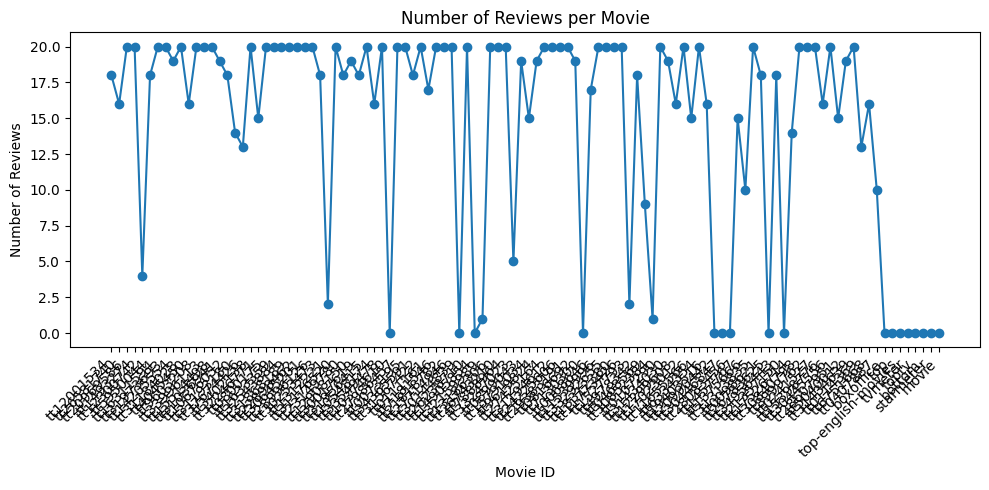

In [42]:
import matplotlib.pyplot as plt

with open("all_reviews.json", "r", encoding="utf-8") as f:
    dict_all = json.load(f)

# print(enumerate(dict_all))
movie_ids = list(dict_all.keys())
review_counts = [len(reviews) for reviews in dict_all.values()]

plt.figure(figsize=(10,5))
plt.plot(movie_ids, review_counts, marker='o')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Movie ID")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Movie")
plt.tight_layout()
plt.show()

46


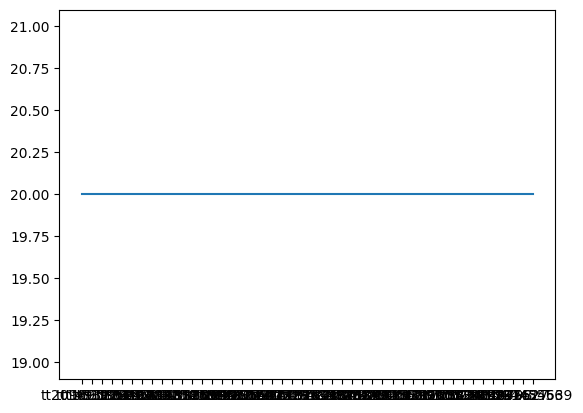

In [47]:
filtered_dict = {imdb_id: reviews for imdb_id, reviews in dict_all.items() if len(reviews) >= 20}

movie_ids = list(filtered_dict.keys())
review_counts = [len(reviews) for reviews in filtered_dict.values()]

print(len(movie_ids))
plt.plot(movie_ids, review_counts)

In [46]:
final_dict = filtered_dict | filtered_dict_1
len(final_dict)

114

In [50]:
with open('final_data.json','w', encoding='utf-8') as f:
    json.dump(final_dict, f, indent=4, ensure_ascii=False)

In [51]:
import pandas as pd

df = pd.read_json('final_data.json')
df.head()

,tt20969586,tt1493274,tt16311594,tt31973693,tt31184028,tt9603208,tt33996113,tt15514498,tt3402138,tt0800175,...,tt9813792,tt0898266,tt2442560,tt3502248,tt2802850,tt13366604,tt2861424,tt31216548,tt0460627,tt23872886
0,{'review': 'Thunderbolts* is unlike anything w...,{'review': 'An another Masterpiece by genius D...,"{'review': 'Firstly, the music. Oh boy!I came ...",{'review': 'It was a rainy afternoon during th...,{'review': 'Going into this film completely bl...,{'review': 'I really wanted to like this movie...,"{'review': 'You can call this a movie, but I c...",{'review': 'This movie seems like it was writt...,{'review': 'What a pleasant surprise that movi...,{'review': 'There was no reason to make this g...,...,{'review': 'I have loved this show so far and ...,{'review': 'When my boyfriend tuned into the p...,{'review': 'Review of Series One:PEAKY BLINDER...,{'review': 'I just want to comment on Madison ...,"{'review': 'From the very start, from the open...",{'review': 'But the others - Rose & Luke espec...,{'review': 'This show is honestly great. It is...,{'review': 'Well I saw that the guy that playe...,{'review': 'David Boreanaz and Emily Deschanel...,{'review': 'Why did I watch this series? The p...
1,"{'review': '""Thunderbolts"" it's some of Marvel...",{'review': 'Who decided this was a dark comedy...,{'review': '...and I went into this expecting ...,{'review': 'I think it's really amazing to hav...,"{'review': 'Rating - 6.9: Overall, a decent bo...",{'review': 'The movie has two really good part...,{'review': 'You can like or dislike this revie...,"{'review': 'The film directorial debut of ""Sha...",{'review': 'Comedy movies seem to be nearing e...,{'review': 'I went into Red Sonja (2025) hopin...,...,{'review': 'Very intriguing series. Good story...,{'review': 'I found the show to be very funny....,"{'review': 'After the show, you cannot stop th...",{'review': 'As a huge fan of Michael Connelly'...,{'review': 'You don't have to have seen the or...,{'review': 'Platonic was everything I hoped it...,{'review': 'This is an extremely solid show. I...,{'review': 'I've been looking forward to The W...,"{'review': 'The dialogue is sharp, the acting ...",{'review': 'I am surprised at the low ratings....
2,{'review': 'I went into this movie with no exp...,"{'review': 'A solid, often entertaining crime ...","{'review': 'It's sort of fun,Brad pitt is his ...",{'review': 'I don't know that I've ever seen a...,{'review': 'My girlfriend and I went to this m...,"{'review': 'Okay, so last night I read some in...",{'review': 'The beauty of Param Sundari lies i...,{'review': 'That has to be the funniest descri...,"{'review': 'There were a few funny moments, bu...",{'review': 'First I wish to say the main actre...,...,{'review': 'UPDATE - SEASON 3: Be warned if yo...,{'review': 'I thoroughly enjoyed seasons 1 to ...,{'review': 'If you like Victorian crime shows ...,{'review': 'Bosch is one of the best police dr...,{'review': 'I just finished watching the pilot...,{'review': 'As a Seth Rogen fan I've been look...,{'review': 'Let me just say that I was very sk...,{'review': 'It has Ozarks and animal kingdom v...,{'review': 'Here is a show that is refreshingl...,{'review': 'This series had so much potential ...
3,{'review': 'After a string of recent disappoin...,{'review': 'An amazing film - a whole lot of f...,{'review': 'I absolutely loved this so glad I ...,{'review': 'I always thought nothing could top...,{'review': 'Body horror is a genre that can be...,{'review': 'Ignore the critics. This was an ab...,{'review': 'It is a simple sweet yet pleasent ...,{'review': 'Wow . I'm in for some action treat...,{'review': 'While not 100% capturing the true ...,{'review': 'Confession first: I discovered the...,...,{'review': 'Godammit the pretext of the series...,{'review': 'Formulaic comedy involving normal ...,{'review': 'Peaky Blinders is all style and no...,{'review': 'How long do I have to wait for Sea...,{'review': 'Since Breaking Bad ende

In [14]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

def get_movie_url(movie_name):
    search_url = f"https://www.imdb.com/find?q={movie_name}&s=tt"
    search_response = requests.get(search_url, headers=headers)
    
    search_soup = BeautifulSoup(search_response.text, "html.parser")
    
    movie_link_tag = search_soup.find("a", class_="ipc-metadata-list-summary-item__t")
    
    if movie_link_tag:
        movie_link = movie_link_tag['href']
        print(movie_link)
        movie_id = movie_link.split('/')[2]
        print(movie_id)
        return movie_id
    else:
        print("Movie not found!")
        return None

def get_reviews(movie_name):
    movie_id = get_movie_url(movie_name)
    if not movie_id:
        return []
    
    reviews_url = f"https://www.imdb.com/title/{movie_id}/reviews/?ref_=tt_ururv_genai_sm&sort=submission_date%2Cdesc"
    
    response = requests.get(reviews_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    reviews = []
    review_elements = soup.find_all("div", class_="ipc-html-content-inner-div")
    
    for review in review_elements:
        reviews.append(review.get_text(strip=True))
    
    return reviews


movie_name = "dune"
movie_reviews = get_reviews(movie_name)

if movie_reviews:
    for idx, review in enumerate(movie_reviews, 1):
        print(f"{idx}. {review}\n")
else:
    print("No reviews found.")


/title/tt15239678/?ref_=fn_ttl_ttl_1
tt15239678
1. Dune: Part Two elevates Denis Villeneuve's vision far beyond the foundations laid in Part One, transforming the careful world-building of the first film into a sweeping, emotionally charged epic. Where the original was criticized by some as slow and incomplete, the sequel delivers momentum, narrative payoff, and breathtaking spectacle in equal measure.The film centers on Paul Atreides (Timothée Chalamet), now stepping fully into his destiny as both leader and reluctant messiah. Chalamet's performance matures here, capturing the tension between personal vulnerability and the weight of prophecy. Zendaya's Chani, given far more depth and screen time, adds emotional grounding and challenges Paul's choices in meaningful ways. The supporting cast-including Javier Bardem, Florence Pugh, Austin Butler, and Rebecca Ferguson-enriches the ensemble with layered portrayals that enhance the political and moral stakes.Visually, Dune: Part Two is stag